In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [2]:
df = pd.read_csv("crime.csv",encoding='latin1')

/home/raphael/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
2,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
3,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
4,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


In [4]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      67181
OFFENSE_DESCRIPTION         0
DISTRICT                 2434
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                67291
STREET                  18336
Lat                     28521
Long                    28521
Location                    0
dtype: int64

# Data cleaning

## SHOOTING

In [5]:
df.drop(['SHOOTING'],axis =1,inplace=True)

## DISTRICT

In [6]:
df['DISTRICT'].value_counts()

B2          78668
C11         66531
D4          62967
B3          56611
A1          54162
C6          35393
D14         31192
E18         27556
E13         27286
E5          21021
A7          20041
A15         10035
External      123
Name: DISTRICT, dtype: int64

In [7]:
df.dropna(subset=['DISTRICT'],inplace=True)

## UCR_PART

In [8]:
df.dropna(subset=['UCR_PART'],inplace=True)

## STREET

In [9]:
df.dropna(subset=['STREET'],inplace=True)

# LAT and LONG

We have the exact number of null lat and null long, so i think it may be the same entries, and we have no null location entries, so we can get the lat and the long from the location column.

Hypothesis: the entries, that have Lat and Long null values, are the same.

In [10]:
a = df[df['Lat'].isna()]['INCIDENT_NUMBER'].tolist()
b = df[df['Long'].isna()]['INCIDENT_NUMBER'].tolist()

In [11]:
a == b

True

The hypotheis is true.

In [12]:
aux = df[df['Lat'].isna()][['Lat','Long','Location']]

In [13]:
aux

,Lat,Long,Location
118,NaN,NaN,"(0.00000000, 0.00000000)"
122,NaN,NaN,"(0.00000000, 0.00000000)"
143,NaN,NaN,"(0.00000000, 0.00000000)"
187,NaN,NaN,"(0.00000000, 0.00000000)"
241,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...
426751,NaN,NaN,"(0.00000000, 0.00000000)"
426772,NaN,NaN,"(0.00000000, 0.00000000)"
426813,NaN,NaN,"(0.00000000, 0.00000000)"
426839,NaN,NaN,"(0.00000000, 0.00000000)"


We don't have the location for that entries, so we'll drop that values.

In [14]:
df.dropna(subset=['Lat','Long'],inplace=True)

In [15]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

# Feature engineer

## Numerical day of week

In [16]:
## changing day of week to numerical valeus
days_of_week = {'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(days_of_week)

In [17]:
df['DAY_OF_WEEK']

32        7
33        6
34        6
35        6
36        3
         ..
426866    4
426867    4
426868    4
426869    4
426871    2
Name: DAY_OF_WEEK, Length: 396388, dtype: int64

In [18]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

## Dropping unused columns

In [19]:
df.drop(['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','UCR_PART','Location','REPORTING_AREA'],axis =1,inplace=True)

In [20]:
df.head()

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
32,Auto Theft,E18,2019,10,7,9,LINCOLN ST,42.259518,-71.121563
33,Auto Theft,E18,2019,10,6,20,METROPOLITAN AVE,42.262092,-71.116710
34,Auto Theft,D14,2019,10,6,15,ALLSTON ST,42.352375,-71.135096
35,Auto Theft,D4,2019,10,6,4,SAINT JAMES AVE,42.349476,-71.076402
36,Auto Theft,A15,2019,10,3,8,N MEAD ST,42.381846,-71.066551


# Data analysis

## District with most occurrences

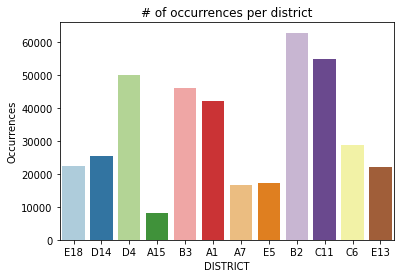

In [21]:
occurrencesDistrict = sns.countplot(x = df['DISTRICT'], palette='Paired')
occurrencesDistrict.set_title('# of occurrences per district')
occurrencesDistrict.set_ylabel("Occurrences")
plt.show()

## Top 10 streets with more occurrences


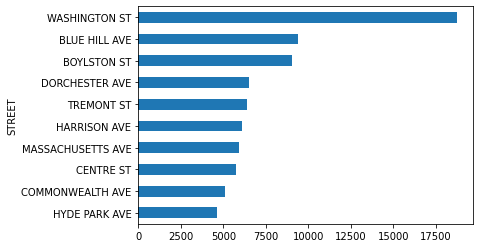

In [22]:
df.groupby('STREET').size().sort_values(ascending = False).head(10).sort_values().plot(kind = 'barh')

Washington street is by far the street with more ocurrences

### Washington street occurences

In [23]:
washingtonStreet = df[df['STREET'] == 'WASHINGTON ST']

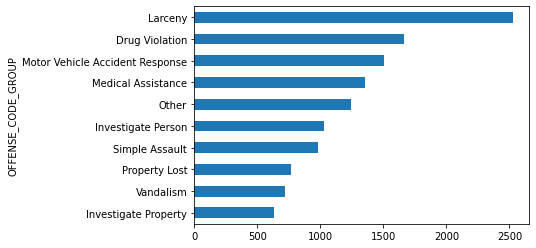

In [24]:
washingtonStreet.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending= False).head(10).sort_values().plot(kind = 'barh')

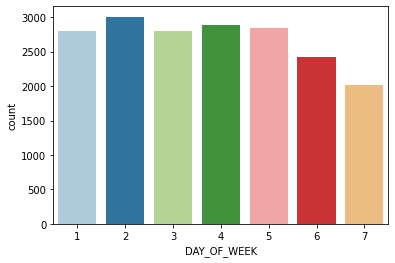

In [25]:
sns.countplot(x = washingtonStreet['DAY_OF_WEEK'],palette='Paired')

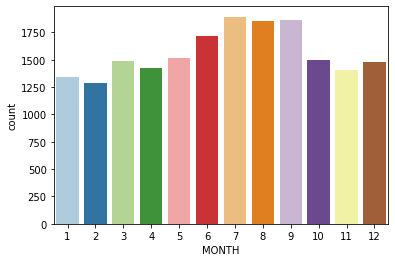

In [26]:
sns.countplot(x = washingtonStreet['MONTH'],palette='Paired')

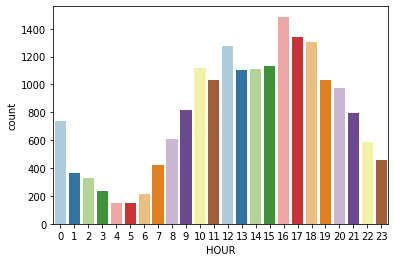

In [27]:
sns.countplot(x = washingtonStreet['HOUR'],palette='Paired')

Quick analysis for Washington street: 
- Larceny is the group with more occurrences
- Sunday is the safest day, probably because there is less movement
- The hours with more occurrences start by 10:00 and end by 18:00, so i think that's the period with more movement on the street
- The occurrences have almost the same distribution in the months, with slightly more occurrencies between june and september

## Day of week with most occurrences

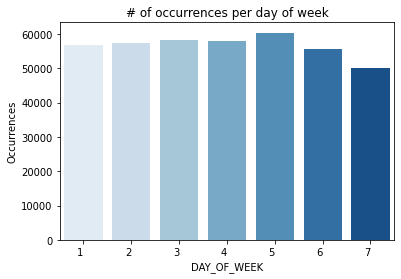

In [28]:
occurrencesDayOfWeek = sns.countplot(x = df['DAY_OF_WEEK'],palette='Blues')
occurrencesDayOfWeek.set_title('# of occurrences per day of week')
occurrencesDayOfWeek.set_ylabel("Occurrences")
occurrencesDayOfWeek.set_xticklabels(occurrencesDayOfWeek.get_xticklabels(),horizontalalignment ='right' )
plt.show()

## OFFENSE_CODE_GROUP with most occurrences

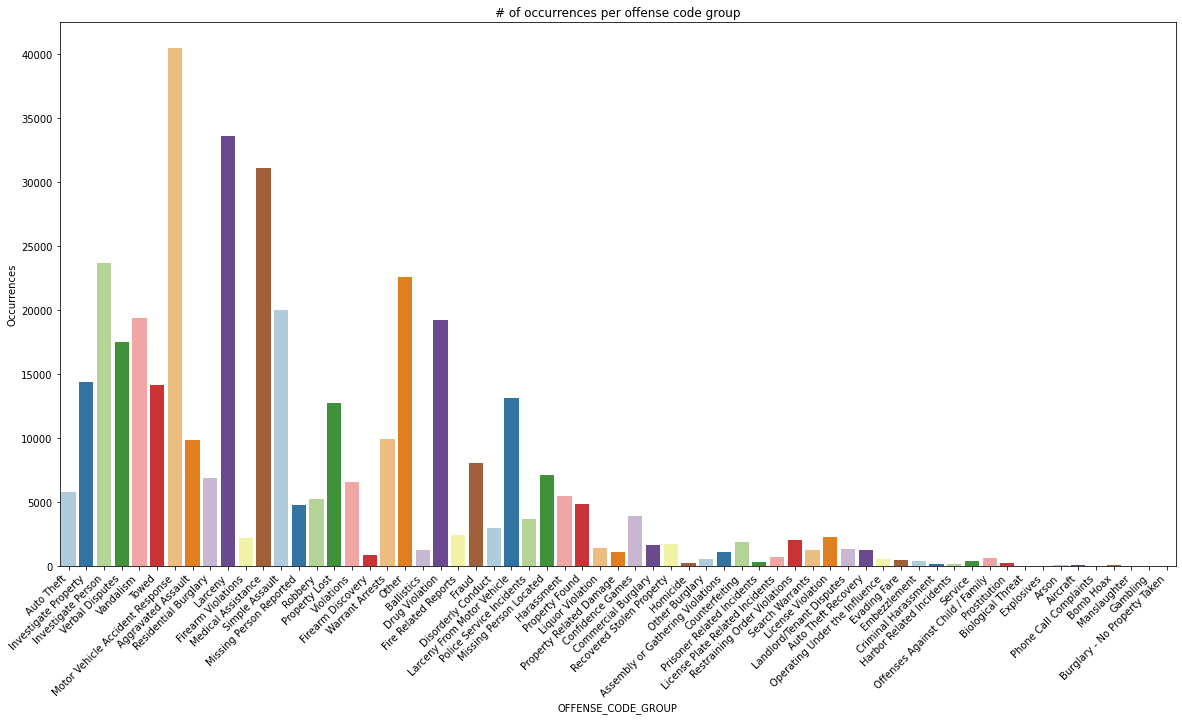

In [29]:
plt.figure(figsize=(20,10))
occurrencesOffenseCodeGroup = sns.countplot(x = df['OFFENSE_CODE_GROUP'],palette='Paired')
plt.figure
occurrencesOffenseCodeGroup.set_title('# of occurrences per offense code group')
occurrencesOffenseCodeGroup.set_ylabel("Occurrences")
occurrencesOffenseCodeGroup.set_xticklabels(occurrencesOffenseCodeGroup.get_xticklabels(),rotation = 45,horizontalalignment ='right' )
plt.show()

We have a few offense codes that correspond for a big number of the occorrences.

In [30]:
len(df)

396388

In [31]:
df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending = False).head()

Motor Vehicle Accident Response    40477
Larceny                            33618
Medical Assistance                 31119
Investigate Person                 23710
Other                              22584
Name: OFFENSE_CODE_GROUP, dtype: int64

### Top 10 offense groups

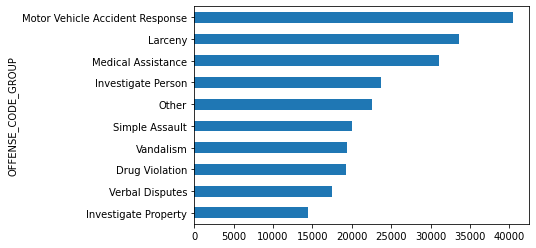

In [32]:
df.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending= False).head(10).sort_values().plot(kind = 'barh')

Larceny is the 'criminal' occurrence that occurs more often, i'll analyze these occurrences deeper, later

## Occurrences by month divided by year

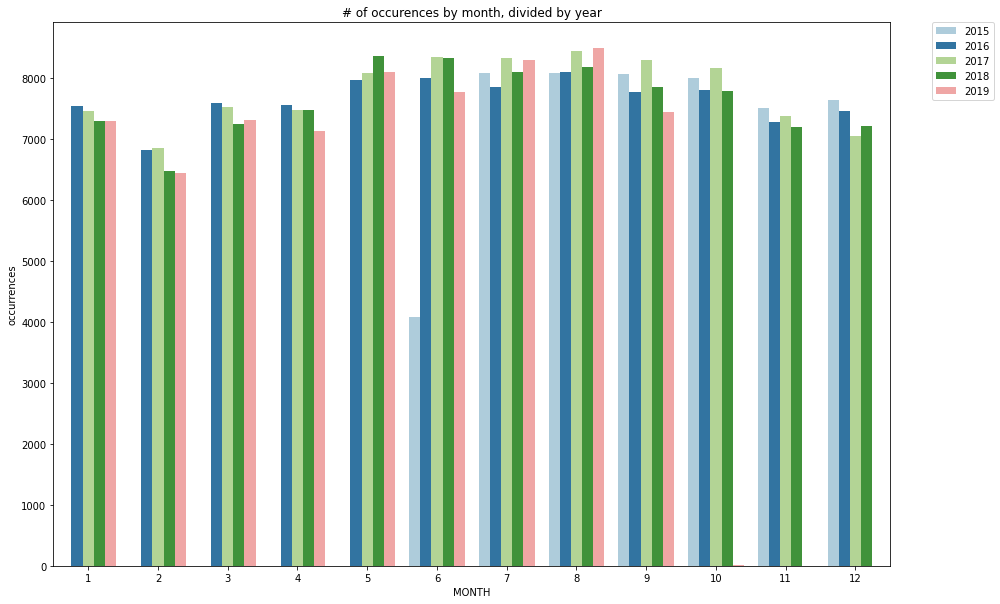

In [33]:
plt.figure(figsize=(15,10))
occurrencesMonthYear = sns.countplot(x = df['MONTH'],hue=df['YEAR'],palette='Paired')
occurrencesMonthYear.set_title('# of occurences by month, divided by year')
occurrencesMonthYear.set_ylabel("occurrences")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The number of occurrences by month is kind of consistent for the years in the dataset, and we can see that we only have entries for the 12 months in 2016,2017 and 2018.

For that reason i'll drop the entries for 2015,2019 and 2020.

In [34]:
df = df[df['YEAR'] != 2015]
df = df[df['YEAR'] != 2019]
df = df[df['YEAR'] != 2020]
len(df)

276647

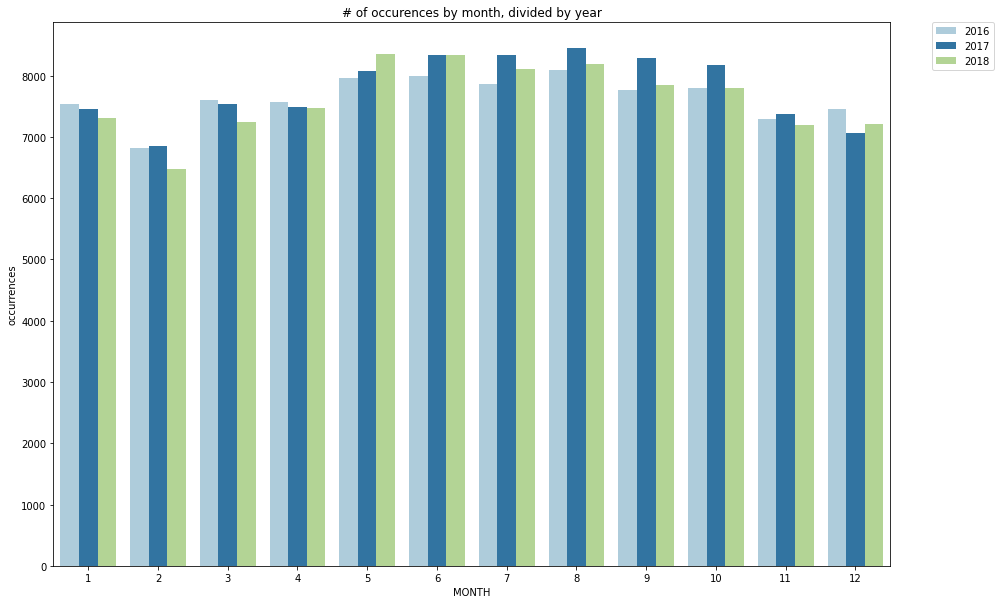

In [35]:
plt.figure(figsize=(15,10))
occurrencesMonthYear = sns.countplot(x = df['MONTH'],hue=df['YEAR'],palette='Paired')
occurrencesMonthYear.set_title('# of occurences by month, divided by year')
occurrencesMonthYear.set_ylabel("occurrences")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Most occurred OFFENSE_CODE_GROUP by day

In [36]:
dfAux = df[['OFFENSE_CODE_GROUP','DAY_OF_WEEK']]

In [37]:
monday = dfAux[dfAux['DAY_OF_WEEK'] == 1]
tuesday = dfAux[dfAux['DAY_OF_WEEK'] == 2]
wednesday = dfAux[dfAux['DAY_OF_WEEK'] == 3]
thursday = dfAux[dfAux['DAY_OF_WEEK'] == 4]
friday = dfAux[dfAux['DAY_OF_WEEK'] == 5]
saturday = dfAux[dfAux['DAY_OF_WEEK'] == 6]
sunday = dfAux[dfAux['DAY_OF_WEEK'] == 7]

In [38]:
mostOccurred = {}
mostOccurred['monday'] = (monday['OFFENSE_CODE_GROUP'].value_counts().index[0],monday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['tuesday'] = (tuesday['OFFENSE_CODE_GROUP'].value_counts().index[0],tuesday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['wednesday'] = (wednesday['OFFENSE_CODE_GROUP'].value_counts().index[0],wednesday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['thursday'] = (thursday['OFFENSE_CODE_GROUP'].value_counts().index[0],thursday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['friday'] = (friday['OFFENSE_CODE_GROUP'].value_counts().index[0],friday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['saturday'] = (saturday['OFFENSE_CODE_GROUP'].value_counts().index[0],saturday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['sunday'] = (sunday['OFFENSE_CODE_GROUP'].value_counts().index[0],sunday['OFFENSE_CODE_GROUP'].value_counts()[0])

In [39]:
mostOccurred

{'monday': ('Motor Vehicle Accident Response', 3901),
 'tuesday': ('Motor Vehicle Accident Response', 3944),
 'wednesday': ('Motor Vehicle Accident Response', 3931),
 'thursday': ('Motor Vehicle Accident Response', 3890),
 'friday': ('Motor Vehicle Accident Response', 4434),
 'saturday': ('Motor Vehicle Accident Response', 4231),
 'sunday': ('Motor Vehicle Accident Response', 3871)}

as we can see, 'Motor vehicle accident response' is the occurence with the most entries, and it makes sense considering the nature of the occurrence

## Locations with more occurrences

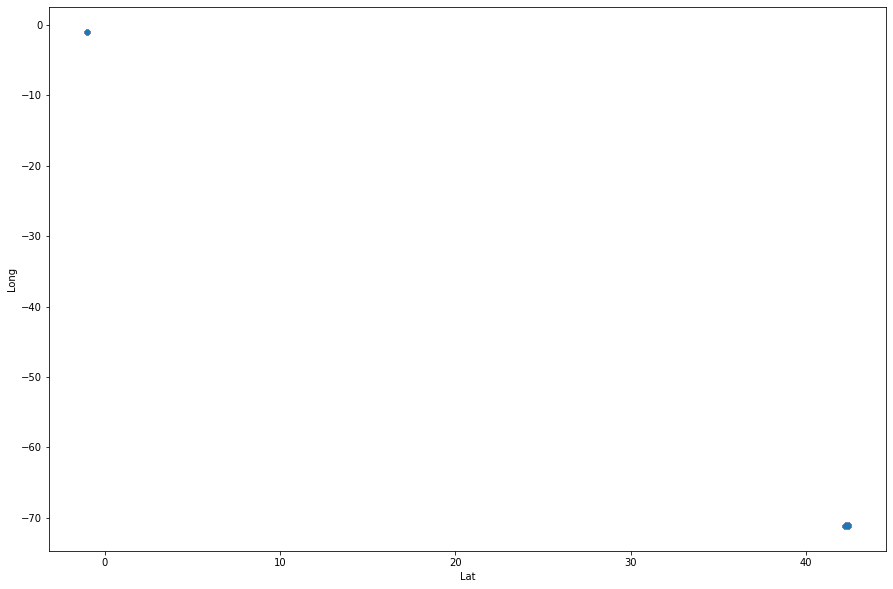

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['Lat'],y = df['Long'],alpha = 0.01)

### Removing outliers

Looks like we have some outliers in the [0,-3] range.

In [41]:
df['Lat'].min()

-1.0

In [42]:
df['Long'].max()

-1.0

In [43]:
#first replace the -1 outliers with nan
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)
#drop nan values
df.dropna(subset=['Lat','Long'],inplace=True)

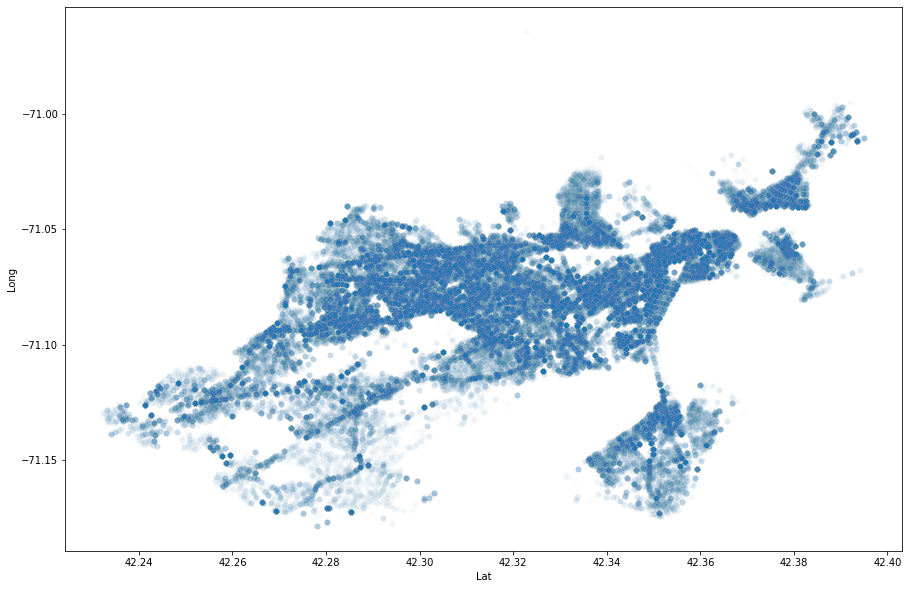

In [44]:
# Plot again
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['Lat'],y = df['Long'],alpha = 0.02)

We can see some 'hotspot' areas where the graph is darker.

In [45]:
print(df['Lat'].min())
print(df['Lat'].max())
print(df['Long'].min())
print(df['Long'].max())


42.2324133
42.39504158
-71.17867378
-70.96436489


# Larceny analysis

In [46]:
larceny = df[df['OFFENSE_CODE_GROUP'] =='Larceny']

In [47]:
len(larceny)

23022

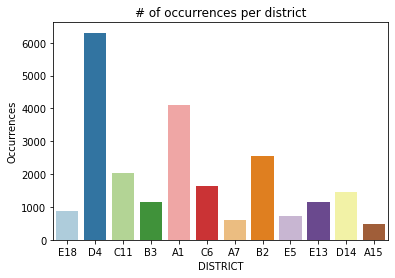

In [48]:
occurrencesDistrictLarceny = sns.countplot(x = larceny['DISTRICT'], palette='Paired')
occurrencesDistrictLarceny.set_title('# of occurrences per district')
occurrencesDistrictLarceny.set_ylabel("Occurrences")
plt.show()

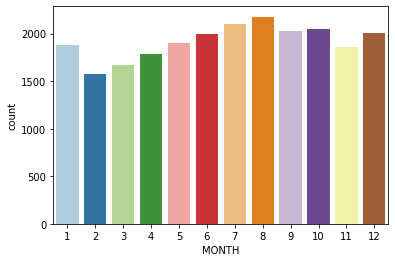

In [49]:
sns.countplot(x = larceny['MONTH'],palette='Paired')

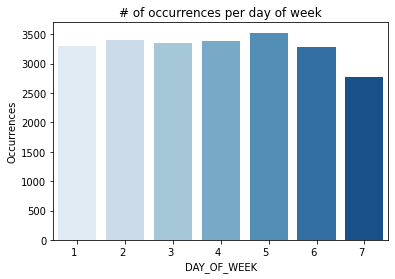

In [50]:
occurrencesDayOfWeekLarceny= sns.countplot(x = larceny['DAY_OF_WEEK'],palette='Blues')
occurrencesDayOfWeekLarceny.set_title('# of occurrences per day of week')
occurrencesDayOfWeekLarceny.set_ylabel("Occurrences")
occurrencesDayOfWeekLarceny.set_xticklabels(occurrencesDayOfWeek.get_xticklabels(),horizontalalignment ='right' )
plt.show()

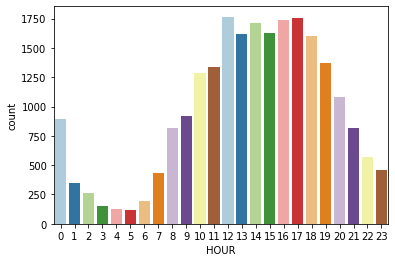

In [51]:
sns.countplot(x = larceny['HOUR'],palette='Paired')

In [52]:
larceny.drop('STREET',axis =1,inplace=True)

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
larceny.to_csv('larcenyData.csv')

In [54]:
larceny

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
1173,Larceny,E18,2018,3,2,8,42.269224,-71.120853
3791,Larceny,D4,2018,10,1,0,42.336750,-71.076628
3841,Larceny,C11,2017,8,3,0,42.300605,-71.059230
3843,Larceny,C11,2018,5,4,0,42.315267,-71.063069
3844,Larceny,C11,2018,3,5,0,42.291108,-71.062811
...,...,...,...,...,...,...,...,...
426828,Larceny,D4,2016,6,7,17,42.336951,-71.085748
426829,Larceny,D4,2016,6,7,17,42.336951,-71.085748
426847,Larceny,B2,2018,12,4,0,42.309563,-71.089902
426848,Larceny,B2,2018,12,4,0,42.309563,-71.089902


## Some insights:

- It occurs mostly in district D4
- Slightly less occurrencies during february, march and may, which are winter months
- Sunday is the day of week with less occurrencies, maybe because people are at home
- Larceny is more likely to occur during the day

## Getting dummies variables

In [55]:
df = pd.get_dummies(df.drop('INCIDENT_NUMBER',axis = 1),drop_first=True,sparse=True)

In [58]:
df

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
983,Investigate Person,B3,2018,4,1,9,HAZLETON ST,42.279971,-71.095534
1173,Larceny,E18,2018,3,2,8,HYDE PARK AVE,42.269224,-71.120853
1798,Harassment,E5,2018,10,3,12,PRIMROSE ST,42.290765,-71.130211
2983,Harassment,A1,2018,4,1,8,ATLANTIC AVE,42.355264,-71.050988
3034,Property Lost,D4,2018,1,1,0,COMMONWEALTH AVE,42.353522,-71.072838
...,...,...,...,...,...,...,...,...,...
426858,Warrant Arrests,E13,2018,1,6,14,CENTRE ST,42.322838,-71.100967
426859,Drug Violation,E13,2018,1,6,14,CENTRE ST,42.322838,-71.100967
426860,Drug Violation,E13,2018,1,6,14,CENTRE ST,42.322838,-71.100967
426861,Warrant Arrests,D4,2016,6,7,17,COVENTRY ST,42.336951,-71.085748


In [57]:
df.columns

Index(['OFFENSE_CODE_GROUP', 'DISTRICT', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'STREET', 'Lat', 'Long'],
      dtype='object')